In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_csv('automobile_data.csv')

In [3]:
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [4]:
# Gerando número de observações e variáveis
observations = len(df)
variables = df.columns[:-1]

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
#df = df.drop(df[df.symboling  == '?'].index)
#df = df.drop(df[df['normalized-losses']  == '?'].index)
#df = df.drop(df[df.make  == '?'].index)
#df = df.drop(df[df['fuel-type']  == '?'].index)
#df = df.drop(df[df.aspiration  == '?'].index)
#df = df.drop(df[df['num-of-doors']  == '?'].index)
#df = df.drop(df[df['body-style']  == '?'].index)
#df = df.drop(df[df['drive-wheels']  == '?'].index)
#df = df.drop(df[df['engine-location']  == '?'].index)
#df = df.drop(df[df['wheel-base']  == '?'].index)
#df = df.drop(df[df.length  == '?'].index)
#df = df.drop(df[df.width  == '?'].index)
#df = df.drop(df[df.height  == '?'].index)
#df = df.drop(df[df['curb-weight']  == '?'].index)
#df = df.drop(df[df['engine-type']  == '?'].index)
#df = df.drop(df[df['num-of-cylinders']  == '?'].index)
#df = df.drop(df[df['engine-size']  == '?'].index)
#df = df.drop(df[df['fuel-system']  == '?'].index)
#df = df.drop(df[df.bore  == '?'].index)
#df = df.drop(df[df.stroke  == '?'].index)
#df = df.drop(df[df['compression-ratio']  == '?'].index)
#df = df.drop(df[df.horsepower  == '?'].index)
#df = df.drop(df[df['peak-rpm']  == '?'].index)
#df = df.drop(df[df['city-mpg']  == '?'].index)
#df = df.drop(df[df['highway-mpg']  == '?'].index)
df = df.drop(df[df.price  == '?'].index)

In [7]:
X = df.iloc[:,:-1]
y = df['price'].values.astype(float)

In [8]:
#CRIAR UMA FUNÇÃO
#loop que percorre lista de colunas categóricas que terão valores por categoria convertidas em número 
X = X.astype(str)
novo_valor_numerico = 0
i = 0
for x in X.columns:
    for z in X[x].drop_duplicates():        
        X[x].replace({z: str(i)}, inplace=True)
        i+=1
    i = 0
X = X.astype(int)

In [9]:
X.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,...,1,1,0,1,1,0,1,0,1,1
3,2,1,1,0,0,1,2,1,0,2,...,0,2,0,2,2,1,2,1,2,2
4,2,1,1,0,0,1,2,2,0,3,...,2,3,0,2,2,2,3,1,3,3
5,2,0,1,0,0,0,2,1,0,2,...,2,3,0,2,2,3,4,1,1,4
6,1,2,1,0,0,1,2,1,0,4,...,2,3,0,2,2,3,4,1,1,4
7,1,0,1,0,0,1,3,1,0,4,...,2,3,0,2,2,3,4,1,1,4
8,1,2,1,0,1,1,2,1,0,4,...,2,4,0,3,2,4,5,1,4,5
10,2,3,2,0,0,0,2,0,0,5,...,0,5,0,4,3,5,6,2,5,6


In [10]:
#modelo com statsmodel
Xc = sm.add_constant(X)
modelo = sm.OLS(y, Xc)
modelo_v1 = modelo.fit()

In [11]:
#R-squared de quase 75%(quanto mais alto melhor) e std err 1560 reais de distância dos preços corretos(quanto menor melhor).
#Variáveis com valor-p alto, maior que 0,05 podem ser excluídas do dataset pois não influenciam estatisticamente y.
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     20.09
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           4.35e-39
Time:                        15:13:03   Log-Likelihood:                -1953.8
No. Observations:                 201   AIC:                             3960.
Df Residuals:                     175   BIC:                             4045.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.451e+04   1560.676      9.295      0.000    1.14e+04    1.76e+04
symboling          1428.0939    407.491      3.505      0.001     623.864    2232.323
normalized-losses   -86.1308     31.754     -2.712      0.007    -148.800     -23.461
make                 84.4604    181.438      0.466      0.642    -273.629     442.550
fuel-type          5101.8285   1878.565      2.716      0.007    1394.269    8809.388
aspiration         5079.0348   1062.658      4.780      0.000    2981.760    7176.310
num-of-doors        802.2973    832.299      0.964      0.336    -840.339    2444.933
body-style          461.0991    446.511      1.033      0.303    -420.142    1342.340
drive-wheels      -3537.5434    776.823     -4.554      0.000   -5070.691   -2004.396
engine-location    1.839e+04   3238.575      5.680      0.000     1.2e+04    2.48e+04
wheel-base           12.2113     34.106      0.358      0.721     -55.101      79.524
length              -50.1580     43.324     -1.158      0.249    -135.663      35.347
width                 0.5599     45.213      0.012      0.990     -88.673      89.793
height              -32.5392     34.715     -0.937      0.350    -101.052      35.974
curb-weight          -2.8656     21.769     -0.132      0.895     -45.829      40.098
engine-type       -1232.6922    412.340     -2.990      0.003   -2046.492    -418.893
num-of-cylinders   2818.1709    308.536      9.134      0.000    2209.240    3427.102
engine-size          13.7084     39.634      0.346      0.730     -64.514      91.931
fuel-system       -1192.4357    244.551     -4.876      0.000   -1675.085    -709.787
bore                -16.5328     43.918     -0.376      0.707    -103.209      70.144
stroke               37.5029     42.828      0.876      0.382     -47.023     122.029
compression-ratio    -9.0945     42.902     -0.212      0.832     -93.767      75.578
horsepower           23.3344     31.498      0.741      0.460     -38.831      85.499
peak-rpm            -24.4697     74.022     -0.331      0.741    -170.560     121.620
city-mpg             50.9321     64.748      0.787      0.433     -76.856     178.720
highway-mpg         -21.5310     53.471     -0.403      0.688    -127.062      84.000
==============================================================================
Omnibus:                       58.635   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.590
Skew:                           1.059   Prob(JB):                     2.33e-55
Kurtosis:                       8.055   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

In [12]:
#correlação(variáveis com grande correlação tende a ter o mesmo significado para o modelo e uma delas pode ser removida para
#reduzir dimensionalidade)
matriz_corr = X.corr()
print (matriz_corr)

                   symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.101423  0.292586   0.172308   
normalized-losses   0.101423           1.000000  0.698446   0.055626   
make                0.292586           0.698446  1.000000   0.109330   
fuel-type           0.172308           0.055626  0.109330   1.000000   
aspiration          0.167021          -0.028975  0.071254   0.408228   
num-of-doors        0.344918           0.078881  0.121393   0.206001   
body-style          0.189074           0.004868  0.153700   0.156145   
drive-wheels       -0.279562           0.101100  0.034844  -0.131096   
engine-location     0.063805          -0.169417  0.053312  -0.040917   
wheel-base          0.456585           0.516359  0.742550   0.140642   
length              0.332115           0.643207  0.915076   0.160969   
width               0.421716           0.336801  0.453780   0.076804   
height              0.463282           0.138257  0.457442   0.05

In [13]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

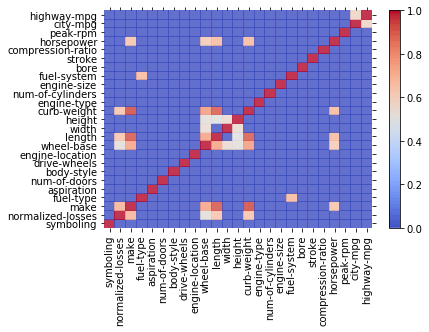

In [14]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

In [15]:
# Criando um modelo
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [16]:
# Treinando o modelo com dados não padronizados (em escalas diferentes)
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, modelo.coef_), df.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

18394.311 engine-location
5101.829 fuel-type
5079.035 aspiration
3537.543 drive-wheels
2818.171 num-of-cylinders
1428.094 symboling
1232.692 engine-type
1192.436 fuel-system
802.297 num-of-doors
461.099 body-style
86.131 normalized-losses
84.460 make
50.932 city-mpg
50.158 length
37.503 stroke
32.539 height
24.470 peak-rpm
23.334 horsepower
21.531 highway-mpg
16.533 bore
13.708 engine-size
12.211 wheel-base
 9.094 compression-ratio
 2.866 curb-weight
 0.560 width


In [18]:
# Padronizando os dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

In [19]:
# Treinando o modelo com dados padronizados (na mesma escala)
Stand_coef_linear_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
# Imprimindo os coeficientes e as variáveis
#após padronização temos a ordem crescente da real relevância das variáveis para o modelo
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), df.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

3373.965 num-of-cylinders
2617.161 fuel-system
2230.389 engine-location
1947.504 aspiration
1943.474 drive-wheels
1527.158 fuel-type
1480.320 symboling
1414.414 normalized-losses
1289.930 engine-type
1098.073 length
526.818 make
430.016 height
411.573 num-of-doors
393.646 horsepower
391.662 city-mpg
388.754 stroke
386.787 body-style
205.492 wheel-base
180.544 bore
177.738 highway-mpg
165.537 engine-size
143.995 peak-rpm
139.473 curb-weight
91.898 compression-ratio
 6.443 width


In [22]:
#FAZENDO TREINAMENTO "FINAL" COM SKLEARN AGORA UTILIZANDO AS VARIÁVEIS MAIS RELEVANTES
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = df[['num-of-cylinders', 'fuel-system', 'engine-location', 'aspiration', 'drive-wheels']]
y = df['price'].values

In [23]:
X.head()

,num-of-cylinders,fuel-system,engine-location,aspiration,drive-wheels
0,four,mpfi,front,std,rwd
1,four,mpfi,front,std,rwd
2,six,mpfi,front,std,rwd
3,four,mpfi,front,std,fwd
4,five,mpfi,front,std,4wd


In [31]:
#loop que percorre lista de colunas categóricas que terão valores por categoria convertidas em número 
X = X.astype(str)
novo_valor_numerico = 0
i = 0
for x in X.columns:
    for z in X[x].drop_duplicates():        
        X[x].replace({z: str(i)}, inplace=True)
        i+=1
    i = 0
X = X.astype(int)

In [32]:
# Divisão em dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Cria o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(normalize = False, fit_intercept = True)

In [34]:
# Treina o modelo
modelo_v2 = modelo.fit(X_train, y_train)

In [35]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))

0.6734076046972972

In [36]:
X.head()

,num-of-cylinders,fuel-system,engine-location,aspiration,drive-wheels
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,2,0,0,0,2


In [40]:
y

array(['13495', '16500', '16500', '13950', '17450', '15250', '17710',
       '18920', '23875', '16430', '16925', '20970', '21105', '24565',
       '30760', '41315', '36880', '5151', '6295', '6575', '5572', '6377',
       '7957', '6229', '6692', '7609', '8558', '8921', '12964', '6479',
       '6855', '5399', '6529', '7129', '7295', '7295', '7895', '9095',
       '8845', '10295', '12945', '10345', '6785', '11048', '32250',
       '35550', '36000', '5195', '6095', '6795', '6695', '7395', '10945',
       '11845', '13645', '15645', '8845', '8495', '10595', '10245',
       '10795', '11245', '18280', '18344', '25552', '28248', '28176',
       '31600', '34184', '35056', '40960', '45400', '16503', '5389',
       '6189', '6669', '7689', '9959', '8499', '12629', '14869', '14489',
       '6989', '8189', '9279', '9279', '5499', '7099', '6649', '6849',
       '7349', '7299', '7799', '7499', '7999', '8249', '8949', '9549',
       '13499', '14399', '13499', '17199', '19699', '18399', '11900',
       '

In [39]:
# Produz a matriz com os novos dados de entrada para a previsão
numofcylinders = 0
fuelsystem = 0
enginelocation = 0
aspiration = 0
drivewheels = 0

# Lista com os valores das variáveis
dados_nova_casa = [numofcylinders, fuelsystem, enginelocation, aspiration, drivewheels]

# Reshape
Xp = np.array(dados_nova_casa).reshape(1, -1)

# Previsão
print("Preço para o carro:", modelo_v2.predict(Xp))

Preço para o carro: [14931.09447163]
